<a href="https://colab.research.google.com/github/RafsanJany-44/Research_Sleep_Stage_Classification/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load, Split dataset and Scaling** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# load dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/RafsanJany-44/Thesis_Project/main/All_DATA/without_sn_and_Epoch/EEG_HMC.csv')


In [2]:
# Split Dataset into X and Y
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [3]:
# Split the X and Y Dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [4]:
# Perform Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
N=4
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = SVC(kernel = 'rbf', random_state = 1,degree=k)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))

1/4 round completed......................... Accurecy: 0.7086637406410209
2/4 round completed......................... Accurecy: 0.7086637406410209
3/4 round completed......................... Accurecy: 0.7086637406410209
4/4 round completed......................... Accurecy: 0.7086637406410209


Text(0, 0.5, 'Testing Accuracy')

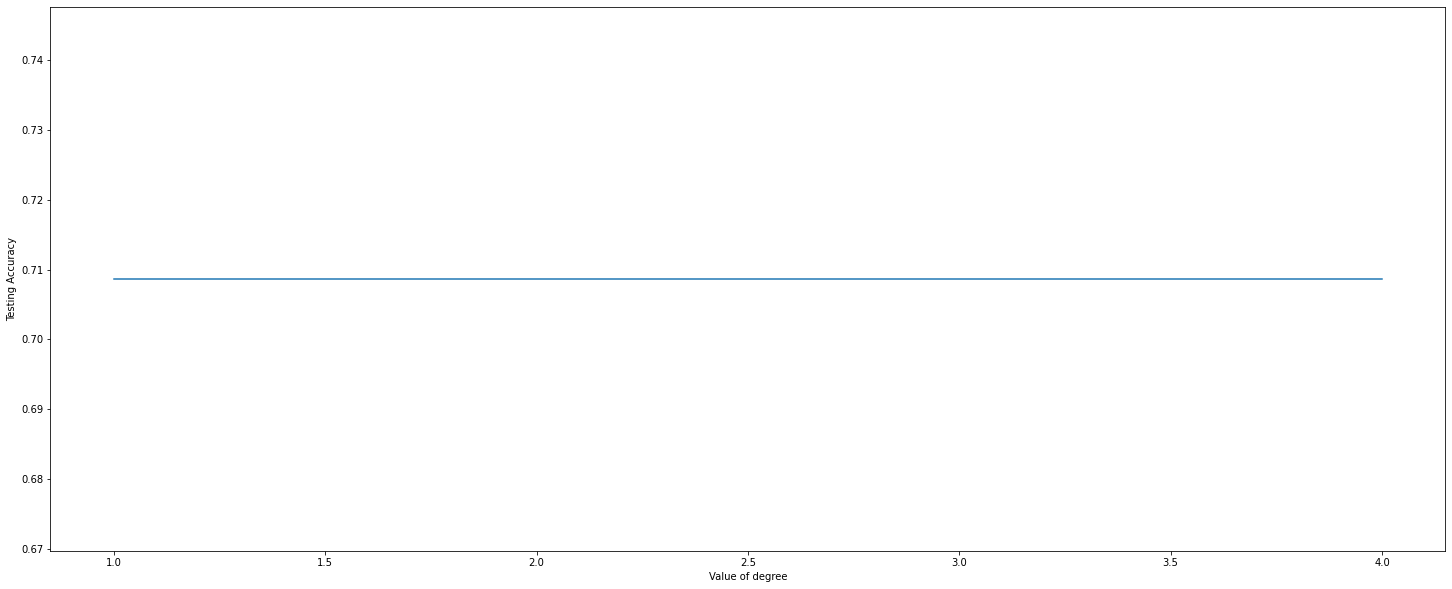

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of degree')
plt.ylabel ('Testing Accuracy')

In [7]:
print("The best degree:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

The best degree:
1


In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
N=['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
scores={}
scores_list = []
for k in N:
  classifier = SVC(kernel = k, random_state = 1,degree=1)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(k+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))

linear round completed......................... Accurecy: 0.6651053000405709
poly round completed......................... Accurecy: 0.6465164312322502
rbf round completed......................... Accurecy: 0.7086637406410209
sigmoid round completed......................... Accurecy: 0.39088260244163314


ValueError: ignored

In [17]:
print("The best Karnel:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

The best Karnel:
rbf


Text(0, 0.5, 'Testing Accuracy')

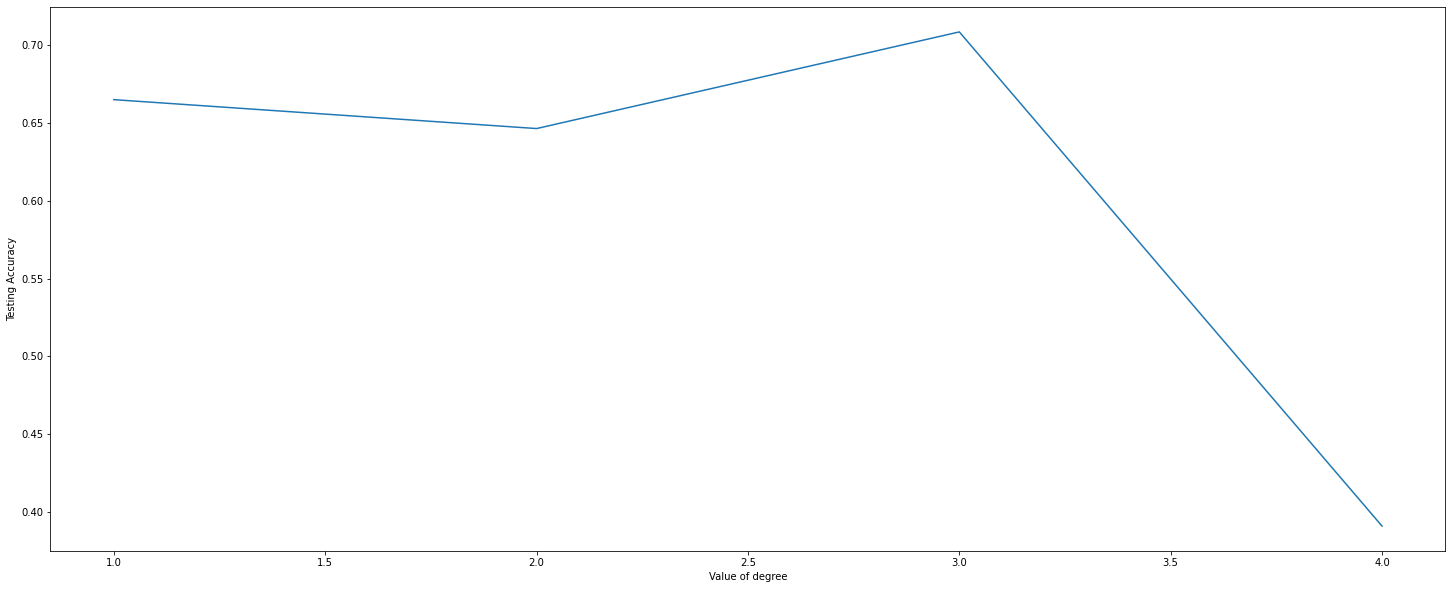

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of degree')
plt.ylabel ('Testing Accuracy')

In [18]:
from sklearn.svm import SVC
classifier = SVC(kernel = best, random_state = 1,degree=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

**Make the Confusion Matrix**

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[ 594  895   37  600  843]
 [ 182 7906  885  559  283]
 [  10 1507 3725   18   32]
 [ 149 1004   58 2882  128]
 [ 285  273   36  115 4107]]
              precision    recall  f1-score   support

          N1       0.49      0.20      0.28      2969
          N2       0.68      0.81      0.74      9815
          N3       0.79      0.70      0.74      5292
           R       0.69      0.68      0.69      4221
           W       0.76      0.85      0.80      4816

    accuracy                           0.71     27113
   macro avg       0.68      0.65      0.65     27113
weighted avg       0.70      0.71      0.69     27113

Accurecy:  0.7086637406410209


Text(69.0, 0.5, 'Truth')

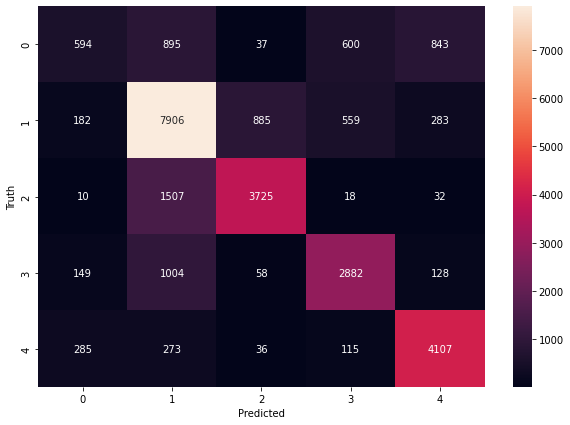

In [20]:
cm =confusion_matrix(y_test,y_pred)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d') # here, cm is called to be visualized
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
def confusion_details(y_test,y_pred):
    labels = list(set(y_test))
    labels.sort()

    print("Total labels: %s -> %s" % (len(labels), labels))

    df = pd.DataFrame(
        data=confusion_matrix(y_test, y_pred, labels=labels),
        columns=labels,
        index=labels
    )

    print(df)

    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Local (metrics per class)
    #
    tps = {}
    fps = {}
    fns = {}
    tns = {}

    precision_local = {}
    recall_local = {}
    f1_local = {}
    accuracy_local = {}
    specificity_local={}

    for label in labels:
        tps[label] = df.loc[label, label]
        fps[label] = df[label].sum() - tps[label]
        fns[label] = df.loc[label].sum() - tps[label]
        tns[label]=len(y_test) - (tps[label] + fps[label] + fns[label])
        
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        
        precision_local[label] = tp / (tp + fp) if (tp + fp) > 0. else 0.
        specificity_local[label] = tn / (tn + fp) if (tn + fp) > 0. else 0.
        recall_local[label] = tp / (tp + fn) if (tp + fp) > 0. else 0.
        p, r = precision_local[label], recall_local[label]
        
        f1_local[label] = 2. * p * r / (p + r) if (p + r) > 0. else 0.
        accuracy_local[label] = tp / (tp + fp + fn) if (tp + fp + fn) > 0. else 0.



    print("#-- Local measures --#")
    print("True Positives(TP):", tps)
    print("False Positives(FP):", fps)
    print("True Negatives(TN):", tns)
    print("False Negatives(FN):", fns)
    print("----------------------------")

    print("Precision:", precision_local)
    print("Recall/Sensitivity:", recall_local)
    print("Specificity:",specificity_local)
    print("F1-Score:", f1_local)
    print("Accuracy:", accuracy_local)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Global
    #
    micro_averages = {}
    macro_averages = {}

    correct_predictions = sum(tps.values())
    true_negative=sum(tns.values())

    den = sum(list(tps.values()) + list(fps.values()))
    micro_averages["Precision"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tps.values()) + list(fns.values()))
    micro_averages["Recall"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tns.values()) + list(fps.values()))
    micro_averages["Specificity"] = 1. * true_negative / den if den > 0. else 0.


    micro_avg_p, micro_avg_r = micro_averages["Precision"], micro_averages["Recall"]
    micro_averages["F1-score"] = 2. * micro_avg_p * micro_avg_r / (micro_avg_p + micro_avg_r) if (micro_avg_p + micro_avg_r) > 0. else 0.

    macro_averages["Precision"] = np.mean(list(precision_local.values()))
    macro_averages["Recall"] = np.mean(list(recall_local.values()))
    macro_averages["Specificity"]=np.mean(list(specificity_local.values()))


    macro_avg_p, macro_avg_r = macro_averages["Precision"], macro_averages["Recall"]
    macro_averages["F1-Score"] = 2. * macro_avg_p * macro_avg_r / (macro_avg_p + macro_avg_r) if (macro_avg_p + macro_avg_r) > 0. else 0.

    total_predictions = df.values.sum()
    accuracy_global = correct_predictions / total_predictions if total_predictions > 0. else 0.

    print("#-- Global measures --#")
    print("Micro-Averages:", micro_averages)
    print("Macro-Averages:", macro_averages)
    print("Correct predictions:", correct_predictions)
    print("Total predictions:", total_predictions)
    print("Accuracy:", accuracy_global)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()



    accuracy_local_new = {}
    for label in labels:
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        accuracy_local_new[label] = (tp + tn) / (tp + fp + fn + tn) if (tp + fp + fn + tn) > 0. else 0.

    total_true = sum(list(tps.values()) + list(tns.values()))
    total_predictions = sum(list(tps.values()) + list(tns.values()) + list(fps.values()) + list(fns.values()))
    accuracy_global_new = 1. * total_true / total_predictions if total_predictions > 0. else 0.

    print("Accuracy (per class), with TNs:", accuracy_local_new)
    print("Accuracy (per class), without TNs:", accuracy_local)
    print("Accuracy (global), with TNs:", accuracy_global_new)
    print("Accuracy (global), without TNs:", accuracy_global)

In [12]:
confusion_details(y_test,y_pred)

Total labels: 5 -> ['N1', 'N2', 'N3', 'R', 'W']
     N1    N2    N3     R     W
N1  594   895    37   600   843
N2  182  7906   885   559   283
N3   10  1507  3725    18    32
R   149  1004    58  2882   128
W   285   273    36   115  4107

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

#-- Local measures --#
True Positives(TP): {'N1': 594, 'N2': 7906, 'N3': 3725, 'R': 2882, 'W': 4107}
False Positives(FP): {'N1': 626, 'N2': 3679, 'N3': 1016, 'R': 1292, 'W': 1286}
True Negatives(TN): {'N1': 23518, 'N2': 13619, 'N3': 20805, 'R': 21600, 'W': 21011}
False Negatives(FN): {'N1': 2375, 'N2': 1909, 'N3': 1567, 'R': 1339, 'W': 709}
----------------------------
Precision: {'N1': 0.48688524590163934, 'N2': 0.6824341821320673, 'N3': 0.7856992195739295, 'R': 0.6904647819837086, 'W': 0.7615427405896532}
Recall/Sensitivity: {'N1': 0.20006736274840015, 'N2': 0.80550178298